<a href="https://colab.research.google.com/github/shantam21/Machine-Learning-Examples/blob/master/Clustering_Techniques/K_means_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv('iBeacon_RSSI_Labeled.csv')
data.head()
data.location.unique()

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

In [5]:
df = data.drop(['date'], axis = 1)
df.head()

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [9]:
features = df.drop(['location'], axis = 1)

In [11]:
#  scaling the values 

features = features / 200
features.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.390,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.390,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-0.385,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-0.385,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-0.385,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [13]:
kmeans.inertia_

382.93535448692904

In [14]:
kmeans.cluster_centers_

array([[-0.99583624, -0.9075784 , -0.81109756, -0.92630662, -0.88648084,
        -0.38310105, -0.99520906, -0.9804878 , -1.        , -0.99585366,
        -1.        , -1.        , -1.        ],
       [-0.98113043, -0.99985507, -0.91269565, -0.67267391, -0.90833333,
        -1.        , -0.9597029 , -0.95555072, -0.97062319, -0.97628261,
        -0.97683333, -0.97153623, -0.95951449],
       [-0.99723476, -0.36490971, -0.86623025, -0.98916479, -0.86978555,
        -1.        , -0.99594808, -0.95318284, -1.        , -0.99863431,
        -1.        , -1.        , -1.        ]])

In [15]:
kmeans.n_iter_

6

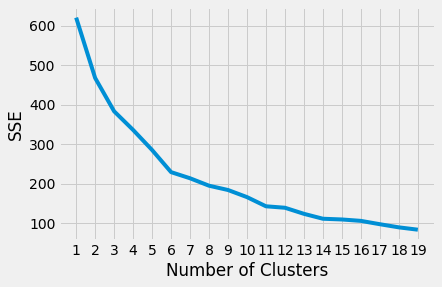

In [19]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [26]:
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

kl.elbow

6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (32) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (40) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (41) found smaller than n_clusters (43). Possibly due to duplicate p

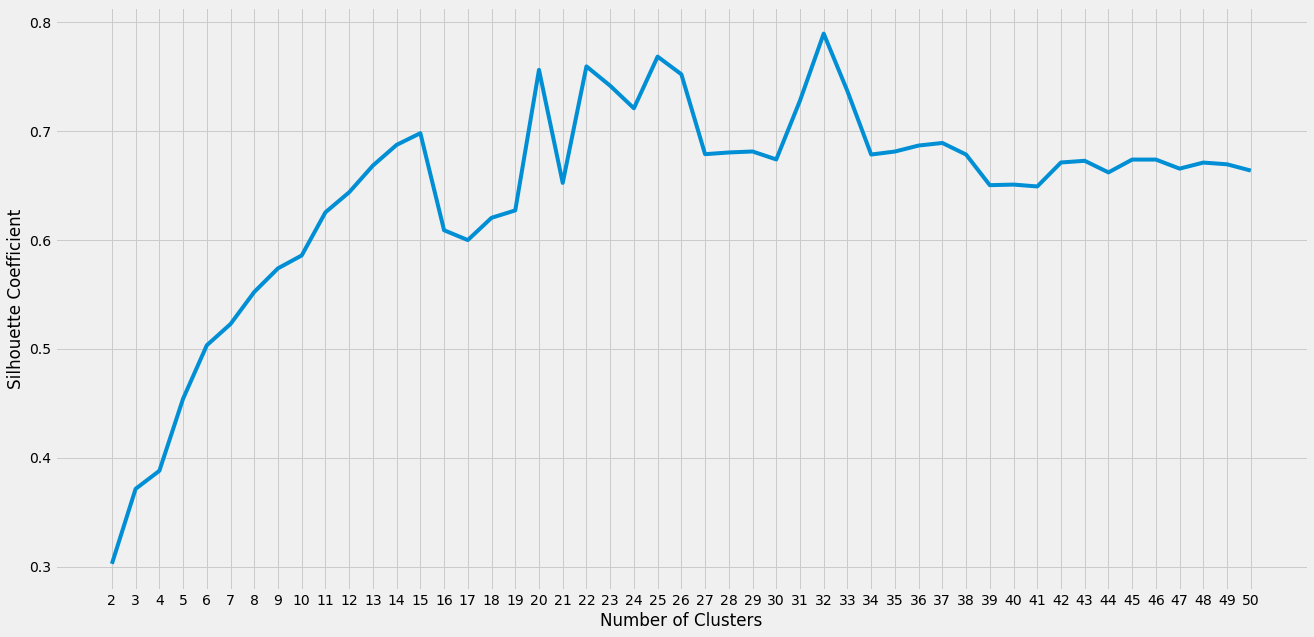

In [33]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 51), silhouette_coefficients)
plt.xticks(range(2, 51))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()